# Praktikum 5

### Import Library

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

### Load Dataset

In [93]:
df = pd.read_csv('../Data/Iris.csv', sep=',')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### info dataset

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### cek missing value

In [95]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### cek duplicate

In [96]:
df.duplicated().sum()

np.int64(0)

### rename column

In [97]:
df = df.rename(columns={
    'SepalLengthCm': 'Panjang_Sepal_cm',
    'SepalWidthCm': 'Lebar_Sepal_cm',
    'PetalLengthCm': 'Panjang_Petal_cm',
    'PetalWidthCm': 'Lebar_Petal_cm',
    'Species': 'Spesies'
})

### info dataset setelah rename

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                150 non-null    int64  
 1   Panjang_Sepal_cm  150 non-null    float64
 2   Lebar_Sepal_cm    150 non-null    float64
 3   Panjang_Petal_cm  150 non-null    float64
 4   Lebar_Petal_cm    150 non-null    float64
 5   Spesies           150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Visualisasi Data

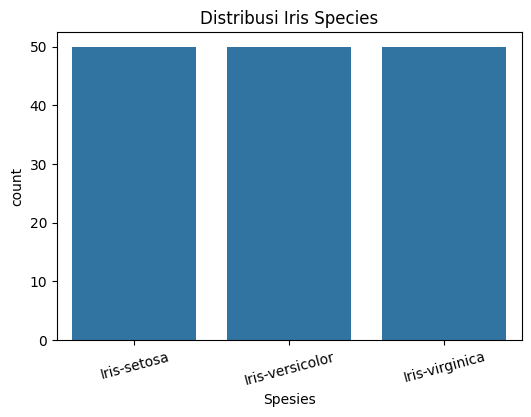

In [99]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Spesies', data=df)
plt.title('Distribusi Iris Species')
plt.xticks(rotation=15)
plt.show()


### Mapping Label

In [100]:
# Mapping label
spesies_cat = df['Spesies'].astype('category')
spesies_classes = list(spesies_cat.cat.categories)
df['Spesies'] = spesies_cat.cat.codes

df

,Id,Panjang_Sepal_cm,Lebar_Sepal_cm,Panjang_Petal_cm,Lebar_Petal_cm,Spesies
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


### Korelasi Antar Fitur

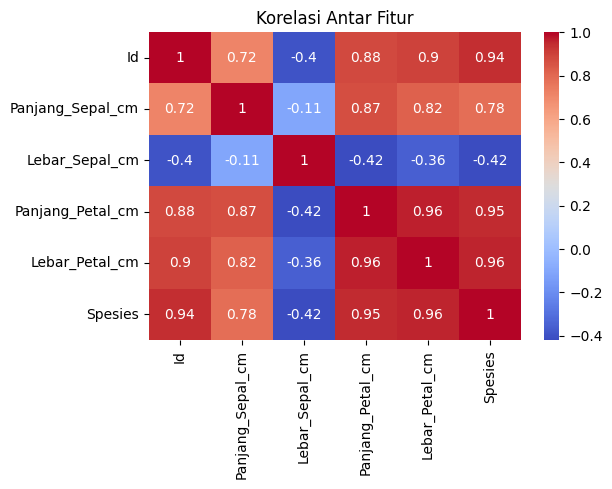

In [101]:
# Korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

### Expliting Data

In [102]:
features = ['Panjang_Sepal_cm', 'Lebar_Sepal_cm', 'Panjang_Petal_cm', 'Lebar_Petal_cm']
X = df[features]
y = df['Spesies']

In [103]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
len(X_train), len(X_test)

(120, 30)

### Membangun Model Decision Tree

In [104]:
# Membangun model Decision Tree
dt = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Evaluasi Model

In [105]:
# Evaluasi model
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=spesies_classes))

Akurasi: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



### Visualisasi Decision Tree

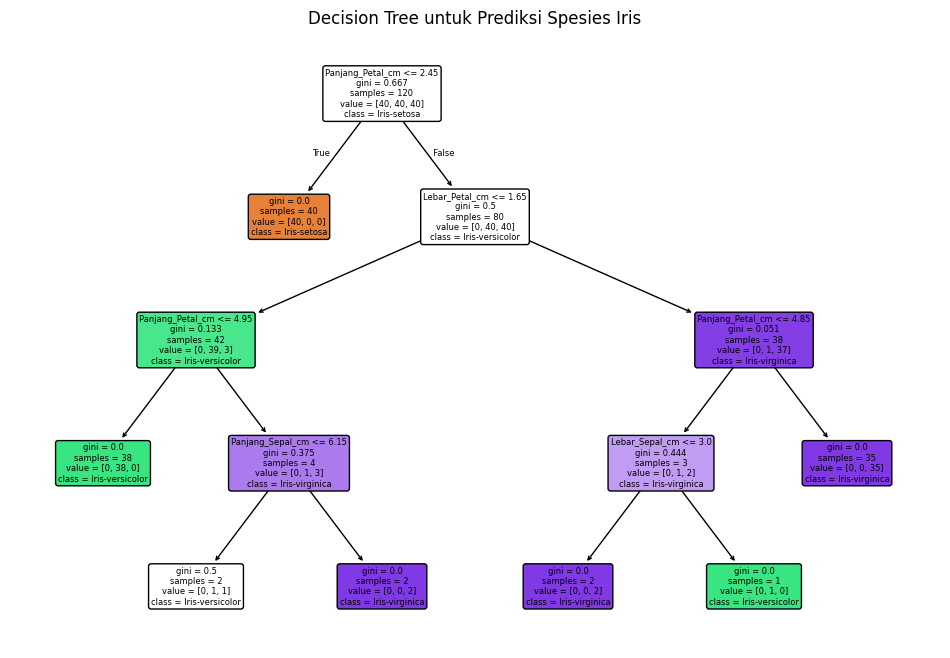

In [106]:
# Visualisasi pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=features, class_names=spesies_classes, filled=True, rounded=True, fontsize=6)
plt.title('Decision Tree untuk Prediksi Spesies Iris')
plt.show()